In [1]:
import numpy as np
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint

In [2]:
train_1=np.load('train_5class_1800.npy', allow_pickle=True, encoding='bytes')
train_ext=np.load('train_extra_added_200.npy', allow_pickle=True, encoding='bytes')

In [3]:
train=np.concatenate((train_1, train_ext), axis=0)

In [4]:
val=np.load('val_5class_200.npy', allow_pickle=True, encoding='bytes')
test=np.load('test_5class_500.npy', allow_pickle=True, encoding='bytes')

In [5]:
# preprocessing train data

n=len(train)
x_train = train[:, :-1]
y_train = train[:, -1]

g = []
for i in range(n):
    a=x_train[i][0]
    g.append(a)
    
train_x = np.array(g)

In [6]:
# preprocessing validation data

o=len(val)
x_val = val[:, :-1]
y_val = val[:, -1]

k=[]
for i in range(o):
    c=x_val[i][0]
    k.append(c)
    
val_x = np.array(k)

In [7]:
#preprocessing test data

m=len(test)
x_test = test[:, :-1]
y_test = test[:, -1]

h=[]
for i in range(m):
    b=x_test[i][0]
    h.append(b)
    
test_x = np.array(h)

In [8]:
import category_encoders as ce
enc = ce.OneHotEncoder(y_train, handle_unknown='return_nan', return_df=True, use_cat_names=True)

In [9]:
y_train = enc.fit_transform(y_train)

In [10]:
y_test = enc.transform(y_test)
y_val = enc.transform(y_val)

In [11]:
train_x.shape

(2000, 432, 504, 3)

In [12]:
cnn = Sequential()

cnn.add(Conv2D(50, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu', input_shape=(432, 504, 3)))

cnn.add(Conv2D(75, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(105, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(150, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(190, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(240, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))

cnn.add(Conv2D(300, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))

cnn.add(Conv2D(330, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
cnn.add(Dropout(0.25))

cnn.add(GlobalAveragePooling2D())

cnn.add(Dense(150, activation='relu'))
cnn.add(Dropout(0.4))
cnn.add(Dense(80, activation='relu'))
cnn.add(Dropout(0.3))


cnn.add(Dense(5, activation='softmax'))

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 144, 168, 50)      1400      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 56, 75)        33825     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 28, 75)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 28, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 10, 105)        70980     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 5, 105)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 5, 105)         0

In [14]:
cnn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [15]:
filepath = "saved-model-{epoch:02d}-{val_loss:.2f}.hdf5"

In [16]:
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='max')

In [17]:
cnn.fit(train_x, y_train, batch_size=8, epochs=50, validation_data=(val_x, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
250/250 [==============================] - ETA: 0s - loss: 1.6125 - accuracy: 0.1925
Epoch 00001: saving model to saved-model-01-1.61.hdf5
250/250 [==============================] - 173s 693ms/step - loss: 1.6125 - accuracy: 0.1925 - val_loss: 1.6093 - val_accuracy: 0.2000
Epoch 2/50
250/250 [==============================] - ETA: 0s - loss: 1.6109 - accuracy: 0.2120
Epoch 00002: saving model to saved-model-02-1.61.hdf5
250/250 [==============================] - 116s 464ms/step - loss: 1.6109 - accuracy: 0.2120 - val_loss: 1.6090 - val_accuracy: 0.2000
Epoch 3/50
250/250 [==============================] - ETA: 0s - loss: 1.6117 - accuracy: 0.1920
Epoch 00003: saving model to saved-model-03-1.61.hdf5
250/250 [==============================] - 116s 465ms/step - loss: 1.6117 - accuracy: 0.1920 - val_loss: 1.6091 - val_accuracy: 0.2000
Epoch 4/50
250/250 [==============================] - ETA: 0s - loss: 1.6095 - accuracy: 0.2025
Epoch 00004: saving model to saved-model-04-1.61.

Epoch 30/50
250/250 [==============================] - ETA: 0s - loss: 0.4443 - accuracy: 0.8450
Epoch 00030: saving model to saved-model-30-0.29.hdf5
250/250 [==============================] - 120s 480ms/step - loss: 0.4443 - accuracy: 0.8450 - val_loss: 0.2872 - val_accuracy: 0.9050
Epoch 31/50
250/250 [==============================] - ETA: 0s - loss: 0.1923 - accuracy: 0.9530
Epoch 00031: saving model to saved-model-31-0.03.hdf5
250/250 [==============================] - 115s 459ms/step - loss: 0.1923 - accuracy: 0.9530 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 32/50
250/250 [==============================] - ETA: 0s - loss: 0.4616 - accuracy: 0.8400
Epoch 00032: saving model to saved-model-32-0.37.hdf5
250/250 [==============================] - 114s 457ms/step - loss: 0.4616 - accuracy: 0.8400 - val_loss: 0.3742 - val_accuracy: 0.9150
Epoch 33/50
250/250 [==============================] - ETA: 0s - loss: 0.2066 - accuracy: 0.9435
Epoch 00033: saving model to saved-model-33-0

In [18]:
train_loss=[1.6125, 1.6109, 1.6117, 1.6095, 1.6108, 1.6112, 1.6101, 1.6089, 1.6042, 1.4327, 1.1667, 1.0895, 1.0338, 0.9901, 
           0.9634, 0.9154, 0.8511, 0.7420, 0.6546, 1.8446, 1.0349, 0.8329, 0.6904, 0.6276, 0.6675, 0.4887, 0.4456, 0.3434, 
           0.2895, 0.4443, 0.1923, 0.4616, 0.2066, 0.1651, 1.3546, 1.6689, 1.6257, 1.6446, 1.4968, 1.1952, 1.1096, 1.0062, 
            0.9360, 1.0385, 1.5426, 1.0139, 0.9058, 0.8887, 0.8548, 0.7937]

In [19]:
val_loss=[1.6093, 1.6090, 1.6091, 1.6092, 1.6094, 1.6091, 1.6088, 1.6052, 1.5780, 1.1819, 1.0858, 0.9936, 0.9615, 0.9274, 
          0.8825, 0.8267, 0.6860, 0.7747, 3.2978, 1.1483, 0.8056, 0.6453, 0.5250, 0.3901, 0.5912, 0.1578, 0.2368, 0.0974,
          0.1481, 0.2872, 0.0276, 0.3742, 0.0402, 0.0353, 1.6920, 1.4981, 1.6539, 1.6356, 1.1891, 1.2396, 1.0682, 0.9016, 
         0.8684, 1.6163, 1.0841, 0.8767, 0.8177, 0.8317, 0.7617, 0.6628]

In [22]:
epochs=[]
for i in range(1, 51):
    epochs.append(i)

print(epochs)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [20]:
len(train_loss), len(val_loss)

(50, 50)

In [21]:
import matplotlib.pyplot as plt

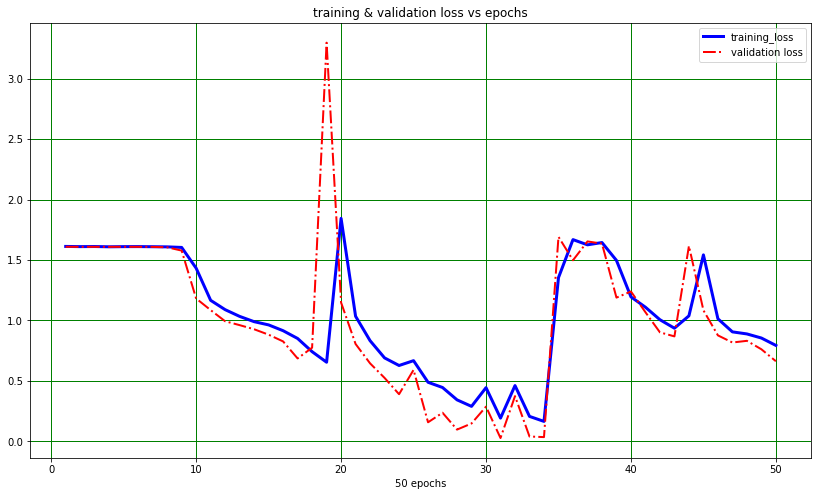

In [23]:
plt.figure(figsize=(14,8))
plt.plot(epochs, train_loss, color='blue', label='training_loss', linestyle='solid', linewidth=3)
plt.plot(epochs, val_loss, color='red', label='validation loss', linestyle='dashdot', linewidth=2)
plt.grid(color='green', linestyle='solid', linewidth=1)
plt.xlabel('50 epochs')
plt.title('training & validation loss vs epochs')
plt.legend()
plt.show()

In [24]:
cnn.load_weights('saved-model-25-0.59.hdf5')

In [25]:
results = cnn.evaluate(test_x, y_test, batch_size=8)
print("test loss, test acc:", results)

63/63 [==============================] - 16s 257ms/step - loss: 0.5881 - accuracy: 0.8140
test loss, test acc: [0.5880771279335022, 0.8140000104904175]


In [26]:
extrnl_test=np.load('external_testdata_15.npy', allow_pickle=True, encoding='bytes')

In [27]:
#preprocessing external test data

q=len(extrnl_test)
x_extrnl_test = extrnl_test[:, :-1]
y_extrnl_test = extrnl_test[:, -1]

w=[]
for i in range(q):
    d=x_extrnl_test[i][0]
    w.append(d)
    
extrnl_test_x = np.array(w)

In [28]:
y_extrnl_test = enc.transform(y_extrnl_test)

In [29]:
results = cnn.evaluate(extrnl_test_x, y_extrnl_test, batch_size=8)
print("test loss, test acc:", results)

2/2 [==============================] - 0s 81ms/step - loss: 2.3446 - accuracy: 0.0667
test loss, test acc: [2.344597816467285, 0.06666667014360428]


In [30]:
yaman_test=np.load('test_yaman_kalyan_imagedata_5.npy', allow_pickle=True, encoding='bytes')

In [31]:
t=len(yaman_test)
x_yaman_test = yaman_test[:, :-1]
y_yaman_test = yaman_test[:, -1]

In [32]:
y_yaman_test

array(['test_Yaman_kalyan', 'test_Yaman_kalyan', 'test_Yaman_kalyan',
       'test_Yaman_kalyan', 'test_Yaman_kalyan'], dtype=object)

In [34]:
y_yaman_test1=np.array(['Yaman_kalyan', 'Yaman_kalyan', 'Yaman_kalyan', 'Yaman_kalyan', 'Yaman_kalyan'], dtype=object)

In [35]:
x=[]
for i in range(t):
    e=x_yaman_test[i][0]
    x.append(e)
    
yaman_test_x = np.array(x)

In [36]:
y_yaman_test1 = enc.transform(y_yaman_test1)

In [37]:
results = cnn.evaluate(yaman_test_x, y_yaman_test1, batch_size=8)
print("test loss, test acc:", results)

1/1 [==============================] - 0s 3ms/step - loss: 5.9466 - accuracy: 0.0000e+00
test loss, test acc: [5.946641445159912, 0.0]


In [38]:
yaman_pred=cnn.predict(yaman_test_x)

In [39]:
yaman_pred

array([[3.1845552e-01, 6.7696434e-01, 3.6315494e-03, 2.4778009e-04,
        7.0081907e-04],
       [2.9671365e-01, 6.9414711e-01, 6.4182929e-03, 7.0545729e-04,
        2.0155513e-03],
       [2.6364583e-01, 7.0206761e-01, 1.8558683e-02, 4.3941033e-03,
        1.1333800e-02],
       [2.9653233e-01, 6.7885488e-01, 1.7418891e-02, 2.2496840e-03,
        4.9442500e-03],
       [3.0031079e-01, 6.9221669e-01, 5.4022265e-03, 5.2654184e-04,
        1.5436753e-03]], dtype=float32)